In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [42]:
weather_hist = pd.read_csv("../data/weather_history/K08D_hist.csv",index_col=0)

In [43]:
weather_covariates = ["temp","rhum","prcp","wdir","wspd","pres"]
weather_hist_subset = weather_hist[weather_covariates+["time"]].dropna()

In [44]:
X = weather_hist_subset[weather_covariates].values
pca = PCA(n_components=X.shape[1])
weather_hist_pca = pd.DataFrame(pca.fit_transform(X)[:,:2])
weather_hist_pca.columns = ["pca_0","pca_1"]
weather_hist_pca.index = pd.to_datetime(weather_hist_subset["time"])

Text(0.5, 1.0, 'PCA variance capture')

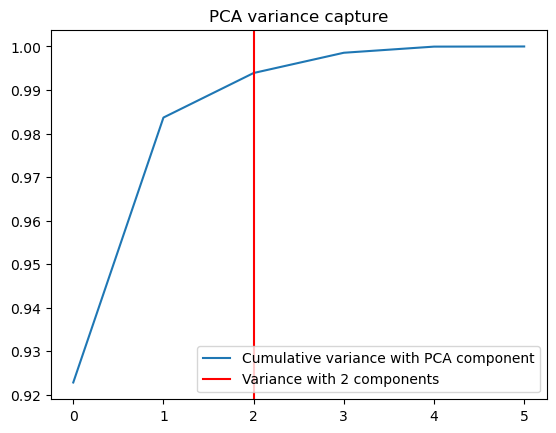

In [45]:
plt.plot(pca.explained_variance_ratio_.cumsum(),label="Cumulative variance with PCA component")
plt.axvline(2,color="red",label="Variance with 2 components")
plt.legend()
plt.title("PCA variance capture")

In [46]:
weather_hist_pca.index.hour

Int64Index([11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
            ...
             9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
           dtype='int64', name='time', length=7966)

In [47]:
weather_hist_pca["hour"] = weather_hist_pca.index.hour
weather_hist_pca["mon"] = weather_hist_pca.index.month
weather_hist_pca["hr_session"] = np.where(weather_hist_pca["hour"].between(9,21),"day","night")
weather_hist_pca["yr_half"] = np.where(weather_hist_pca["mon"]<=6,"h1","h2")
weather_hist_pca["season"] = np.where(weather_hist_pca["mon"].isin([6,7,8,9]),"summer","winter")
weather_hist_pca["time_ad"] = weather_hist_pca["season"] + "_" + weather_hist_pca["hr_session"]
# weather_pca["mon"] = weather_pca.index.

Text(0.5, 1.0, '$\\mathcal{P}(weather|location=K08D,time=time\\_ad)$')

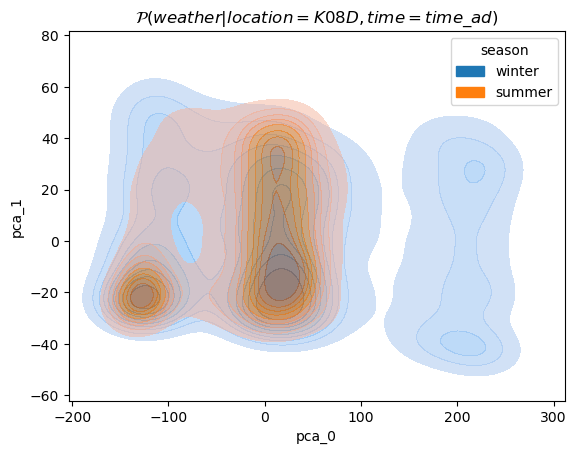

In [50]:
sns.kdeplot(
    data=weather_hist_pca, x="pca_0", y="pca_1",
    fill=True,alpha=0.5,
    hue="season",bw_adjust=1)
plt.title("$\mathcal{P}(weather|location=K08D,time=time\_ad)$")

Text(0.5, 1.0, '$\\mathcal{P}(weather|location=K08D,time=time\\_ad)$')

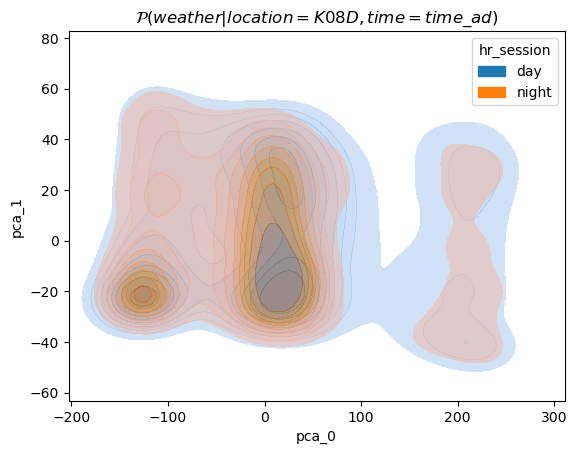

In [51]:
sns.kdeplot(
    data=weather_hist_pca, x="pca_0", y="pca_1",
    fill=True,alpha=0.5,
    hue="hr_session",bw_adjust=1)
plt.title("$\mathcal{P}(weather|location=K08D,time=time\_ad)$")

Text(0.5, 1.0, '$\\mathcal{P}(weather|location=K08D,time=time\\_ad)$')

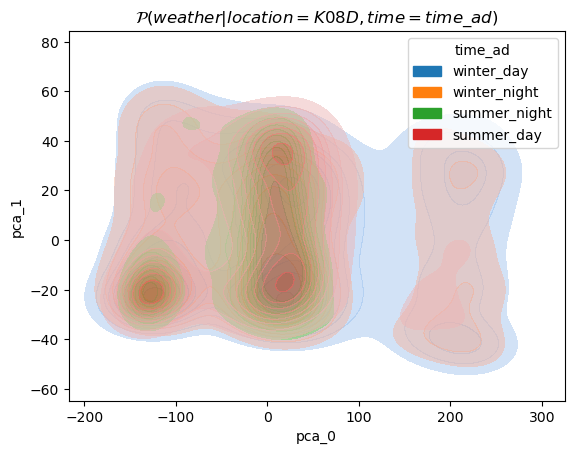

In [52]:
sns.kdeplot(
    data=weather_hist_pca, x="pca_0", y="pca_1",
    fill=True,alpha=0.5,
    hue="time_ad",bw_adjust=1)
plt.title("$\mathcal{P}(weather|location=K08D,time=time\_ad)$")